In [1]:
import numpy as np

In [2]:
def checkIt2(dd4, step):
    """
    회복이 되면 2
    아직 아프면 1
    """
    if dd4+14<step:
        return 2
    else:
        return 1

def checkIt(dd,dd2,dd77,dd4,j, step, touchDistance):
    """
    간염자 j 와 i의 거리가 0.01보다 작으면...
    i도 간염자로 지정하고 간염날짜(step)를 dd4에 기록한다.
    """
    import math
    for i,ii in enumerate(dd77):
        if ii==1 and dd4[i] > 0 and dd4[j]==0:
            if touchDistance>math.sqrt((dd[j]-dd[i])**2+(dd2[j]-dd2[i])**2):
                dd4[j] = step
                return 1
    return 0

def makeArray(dd,dd2,dd77,dd4,step, touchDistance):
    import copy
    dd44 = copy.deepcopy(dd4)
    return np.array([ checkIt2(dd44[i], step) if ii>0 else checkIt(dd,dd2,dd77,dd4, i, step, touchDistance) for i,ii in enumerate(dd77) ])

def makeHistory(dd77, step):
    unique, counts = np.unique(dd77, return_counts=True)
    yy = dict(zip(unique, counts))
    yy['step'] = step
    return yy

In [3]:
def makeStart():
    ### number of person
    #N      = 100
    N      = 1000
    
    ### 퍼짐 정도,
    scaleA = 3000
    ### 1회 이동시 정도
    scaleB = 70
    #scaleB = 3000
    
    ### 간염자 초기 비율
    sourceRate    =  10/1000
    #sourceRate    =  100/1000
    
    ## 감염이 되는 최대거리
    touchDistance = 60
    #touchDistance = 600
    
    ## 이벤트 실시 횟수
    MaxN = 200

    ## 활동성이 큰 움직임의 비율
    BigMoveRate = 0.001

    dd  = np.random.rand(N)*scaleA
    dd2 = np.random.rand(N)*scaleA

    dd77 = np.array([ 1 if i< sourceRate else 0 for i in np.random.rand(N)])
    dd4  = dd77
    dd88 = np.array([ scaleB*10 if i< BigMoveRate else scaleB for i in np.random.rand(N)])

    step = 1
    
    return dd,dd2,dd77,dd4,dd88,step,N,{ "scaleA":scaleA,"scaleB":scaleB,
                                       "sourceRate":sourceRate,"touchDistance":touchDistance,
                                       "MaxN":MaxN,"BigMoveRate":BigMoveRate,
                                     }

In [4]:
def makeAll(Histories):
    dd,dd2,dd77,dd4,dd88,step,N, config = makeStart()

    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(10, 8))

    #np.sum(dd77),step
    %matplotlib inline
    import matplotlib.pyplot as plt
    from matplotlib import cm
    import numpy as np
    from celluloid import Camera
    ### apt install ffmpeg
    ### pip install celluloid

    camera = Camera(plt.figure())
    sc = plt.scatter(dd,dd2, c=dd77, marker="x", vmin=0,vmax=2)
    plt.colorbar(sc)
    camera.snap()
    camera.snap()
    camera.snap()

    history = []
    history.append( makeHistory(dd77,step) )
    for _ in range(config['MaxN']):
        step += 1
        """
        각 step마다 사람들이 random walk(x, y)를 하도록함.
        """
        dd5  = np.random.rand(N)*dd88 
        dd   = dd +(dd5-dd88*0.5) 
        dd6  = np.random.rand(N)*dd88
        dd2  = dd2+(dd6-dd88*0.5) 
        dd77 = makeArray(dd,dd2,dd77,dd4,step, config['touchDistance'])
        history.append( makeHistory(dd77,step) )
        sc=plt.scatter(dd,dd2, c=dd77, marker="x", vmin=0,vmax=2)
        #plt.colorbar(sc)

        camera.snap()

    sc=plt.scatter(dd,dd2, c=dd77, marker="x", vmin=0,vmax=2)
    camera.snap()
    camera.snap()
    camera.snap()
    camera.snap()
    camera.snap()
    camera.snap()

    anim = camera.animate(blit=True)
    anim.save('output/scatter.mp4')
    from matplotlib import rc
    rc('animation', html='html5')

    Histories.append( {"history":history, "config":config} ) 


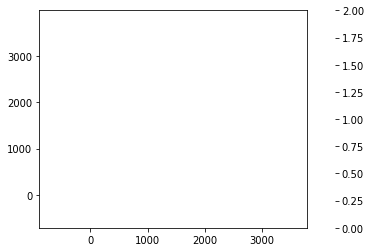

In [12]:
Histories = []
for i in range(100):
    makeAll(Histories)


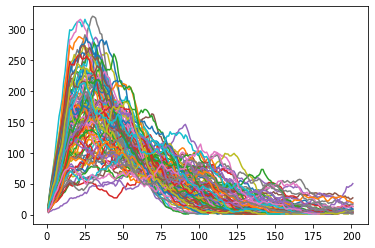

In [13]:
import pandas as pd
from datetime import datetime
c = datetime.now().strftime("%Y%m%d%H%M")
import matplotlib.pyplot as plt

for i in range(100):
    df = pd.DataFrame(Histories[i]['history'])
    plt.plot(df["step"],df[1])
plt.savefig("output/ddd"+c+".pdf")

In [14]:
import pickle

with open('output/ddd'+c+'.pickle', 'wb') as f:
    pickle.dump(Histories, f)

In [15]:
import pickle
with open('output/ddd'+c+'.pickle', 'rb') as f:
    data = pickle.load(f)

In [17]:
from IPython.display import HTML
HTML("""<video width="{}" height="{}" controls>
    <source src={} type="video/mp4">
    </video>""".format(480, 360, "./output/scatter.mp4"))

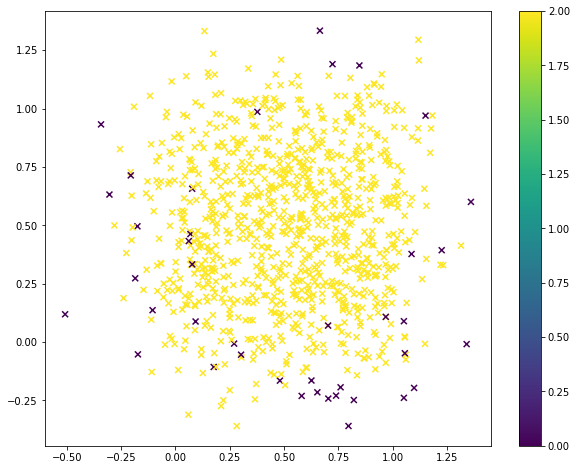

In [795]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))

step += 1
dd5 = np.random.rand(1000)
dd = dd+(dd5-0.5)*0.1
dd6 = np.random.rand(1000)
dd2 = dd2+(dd6-0.5)*0.1

dd77 = makeArray(dd,dd2,dd77,dd4,step)

sc = plt.scatter(dd,dd2, c=dd77, marker="x", vmin=0,vmax=2)
plt.colorbar(sc)

#np.sum(dd77),step